# Análise de Séries Temporais - Ações do Banco Itaú

Este notebook realiza uma análise de séries temporais das ações do Banco Itaú. O objetivo é explorar os dados históricos das ações e criar modelos de previsão para o preço de fechamento.

## Visão Geral

A análise de séries temporais é uma técnica estatística que lida com dados que variam ao longo do tempo. Neste projeto, estamos focando nas ações do Banco Itaú e buscamos entender os padrões e tendências nos preços de fechamento ao longo do tempo. Além disso, queremos criar modelos preditivos que possam prever o preço de fechamento futuro com base nos dados históricos.

A análise será dividida em várias etapas principais:

1. Importação dos dados: Faremos a importação dos dados históricos das ações do Banco Itaú a partir de uma fonte confiável, como um arquivo CSV ou uma API de dados financeiros. Os dados geralmente incluirão a data, preço de abertura, preço de fechamento, preço máximo, preço mínimo e volume de negociação.

2. Análise Exploratória dos Dados: Realizaremos uma análise exploratória dos dados para entender melhor as características da série temporal. Isso pode incluir a visualização dos dados em gráficos de linha, histogramas e estatísticas descritivas. Também investigaremos a presença de tendências, sazonalidade e outliers nos dados.

3. Pré-processamento dos Dados: Antes de criar os modelos de previsão, faremos o pré-processamento dos dados. Isso pode incluir o tratamento de valores ausentes, a transformação de dados não numéricos em numéricos, a normalização dos dados e a divisão dos dados em conjuntos de treinamento e teste.

4. Modelagem: Utilizaremos modelos de séries temporais, como o ARIMA (AutoRegressive Integrated Moving Average) e o SARIMA (Seasonal ARIMA), para criar previsões do preço de fechamento das ações. Ajustaremos os parâmetros do modelo e avaliaremos sua qualidade usando métricas apropriadas.

5. Avaliação do Modelo: Avaliaremos o desempenho do modelo utilizando métricas de erro, como o erro médio absoluto (MAE) e o erro quadrático médio (MSE). Também compararemos as previsões com os valores reais por meio de gráficos e visualizações.

6. Previsões: Finalmente, faremos previsões futuras do preço de fechamento das ações com base no melhor modelo selecionado. Essas previsões podem ser usadas para tomar decisões de investimento ou avaliar o desempenho do mercado.

## Ferramentas Utilizadas

- Python: Utilizaremos a linguagem de programação Python para realizar a análise de séries temporais. Faremos uso de bibliotecas populares, como pandas, numpy, matplotlib e statsmodels.

- Jupyter Notebook: O Jupyter Notebook é uma interface interativa que permite combinar código, visualizações e documentação em um único documento. Usaremos o Jupyter Notebook para executar e documentar nossa análise de séries temporais.

## Conjunto de Dados

O conjunto de dados utilizado neste projeto consiste nos dados históricos diários das ações do Banco Itaú. Os dados incluem informações como a data, preço de abertura, preço de fechamento, preço máximo, preço mínimo e volume de negociação.

## Referências

- Documentação do pandas: https://pandas.pydata.org/docs/
- Documentação do numpy: https://numpy.org/doc/
- Documentação do matplotlib: https://matplotlib.org/stable/contents.html
- Documentação do statsmodels: https://www.statsmodels.org/stable/index.html



# Instalação e importação das Bibliotecas

Este notebook requer a instalação das seguintes bibliotecas:

- pmdarima
- pyramid-arima
- statsmodels
- pandas
- matplotlib
- numpy
- seaborn
- sklearn


In [627]:
# !pip install pmdarima
# !pip install pyramid-arima
# !pip install statsmodels
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install sklearn

In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Leitura dos Dados

Nesta etapa, é realizada a leitura do arquivo CSV contendo os dados históricos das ações do Banco Itaú. O caminho do arquivo é definido pela variável `ITAU_DATA_PATH`.

Certifique-se de ter o arquivo CSV no diretório especificado ou ajuste o caminho do arquivo de acordo com a localização correta.


In [629]:
ITAU_DATA_PATH = "ITUB3 Dados Históricos.csv"
NATURA_DATA_PATH = "NTCO3 Dados Históricos.csv"

df_itau = pd.read_csv(ITAU_DATA_PATH)
print ("Itau - Informações do dataset:")
print("Total de linhas e colunas: ", df_itau.shape)
df_nat = pd.read_csv(NATURA_DATA_PATH)
print ("Natura - Informações do dataset:")
print("Total de linhas e colunas: ", df_nat.shape)


Itau - Informações do dataset:
Total de linhas e colunas:  (3336, 7)
Natura - Informações do dataset:
Total de linhas e colunas:  (3336, 7)


In [630]:
Columns = ['Data', 'Último']
train_samples = 2836
test_samples = 500
tick = 10

df_itau = df_itau[-(train_samples + test_samples):]
df_nat = df_nat[-(train_samples + test_samples):]


# Divisão dos Dados

Nesta etapa, os dados são divididos em conjuntos de treinamento e teste. Também é criado um DataFrame `all_data` que contém todos os dados.

O DataFrame df_itau é dividido em train, que contém as primeiras train_samples linhas, e test, que contém as linhas seguintes até o índice train_samples + test_samples. O DataFrame all_data contém todas as linhas de df_itau até o índice train_samples + test_samples.

Em seguida, a coluna 'Data' em train, test e all_data é convertida para o tipo datetime usando o método pd.to_datetime() e a coluna 'Último' é convertida para o tipo float.

In [631]:
train = df_itau[:train_samples]
test = df_itau[train_samples:train_samples + test_samples]
all_data = df_itau[:train_samples + test_samples]

train.loc[:, 'Data'] = pd.to_datetime(train['Data'], dayfirst=True)
test.loc[:, 'Data'] = pd.to_datetime(test['Data'], dayfirst=True)
all_data['Data'] = pd.to_datetime(all_data['Data'], dayfirst=True)

train_nat = df_nat[:train_samples]
test_nat = df_nat[train_samples:train_samples + test_samples]
all_data_nat = df_nat[:train_samples + test_samples]

train_nat.loc[:, 'Data'] = pd.to_datetime(train_nat['Data'], dayfirst=True)
test_nat.loc[:, 'Data'] = pd.to_datetime(test_nat['Data'], dayfirst=True)
all_data_nat['Data'] = pd.to_datetime(all_data_nat['Data'], dayfirst=True)

# Convertendo os dados para o float32
train.loc[:, 'Último'] = train['Último'].str.replace(',', '.').astype('float32')
test.loc[:, 'Último'] = test['Último'].str.replace(',', '.').astype('float32')

train_nat.loc[:, 'Último'] = train_nat['Último'].str.replace(',', '.').astype('float32')
test_nat.loc[:, 'Último'] = test_nat['Último'].str.replace(',', '.').astype('float32')

# Análise Exploratória

Nesta etapa da análise, é realizada a plotagem dos dados de treinamento e teste em um gráfico, proporcionando uma visão geral do comportamento dos preços de fechamento das ações do Banco Itaú ao longo do tempo.

## Plotagem dos Dados de Treinamento e Teste

Os dados de treinamento e teste são plotados em um gráfico, permitindo a visualização da série temporal. Os preços de fechamento das ações são representados no eixo vertical (y), enquanto as datas correspondentes são exibidas no eixo horizontal (x).

Os dados de treinamento são plotados com uma linha contínua, e os dados de teste são plotados com outra linha contínua de cor diferente. Isso permite uma comparação visual entre os dois conjuntos de dados.


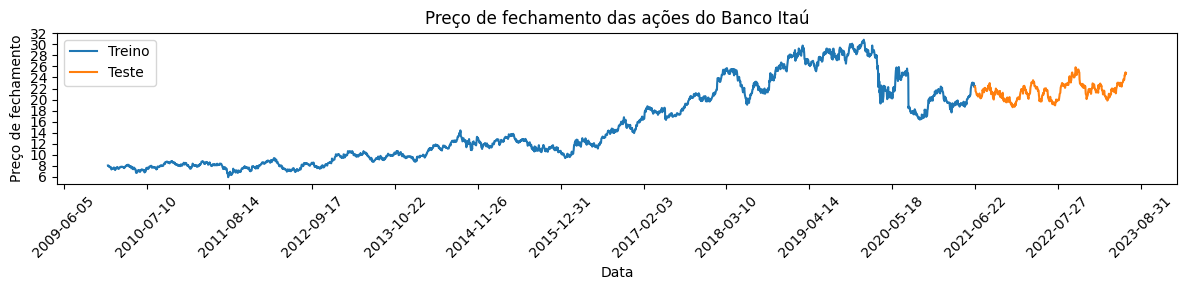

In [632]:
# Definir a frequência dos marcadores nos eixos x e y
tick = 15

# Plot dos dados de treino e teste
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(train['Data'], train['Último'], label='Treino')
ax.plot(test['Data'], test['Último'], label='Teste')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações do Banco Itaú')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.legend(loc='best')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


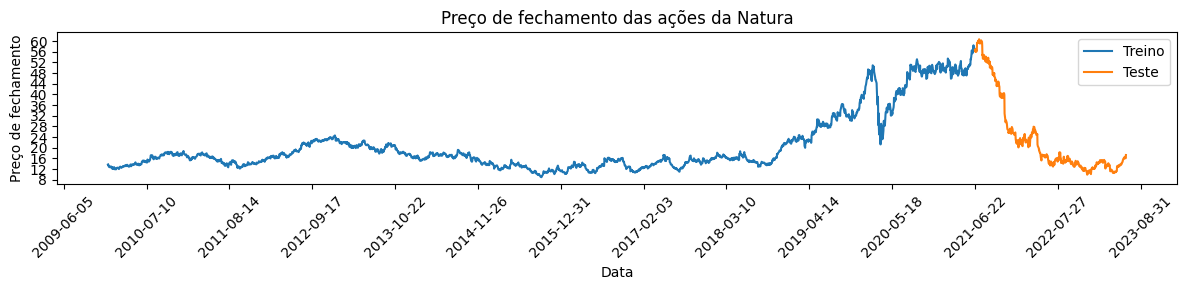

In [633]:
# Definir a frequência dos marcadores nos eixos x e y
tick = 15

# Plot dos dados de treino e teste
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(train_nat['Data'], train_nat['Último'], label='Treino')
ax.plot(test_nat['Data'], test_nat['Último'], label='Teste')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações da Natura')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.legend(loc='best')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Decomposição da Série Temporal

Nesta etapa da análise, é realizada a decomposição da série temporal dos preços de fechamento das ações do Banco Itaú. A decomposição é feita usando o método "additive" (aditivo) e um período de 30.

Primeiro, a coluna 'Data' é definida como o índice do DataFrame para facilitar a manipulação dos dados. Em seguida, as colunas indesejadas, como 'Abertura', 'Máxima', 'Mínima', 'Vol.' e 'Var%', são removidas do DataFrame.

A coluna 'Último' é convertida para o tipo float para garantir que os valores sejam tratados corretamente na decomposição.

### Decomposição

A decomposição é realizada usando a função seasonal_decompose do pacote statsmodels.tsa.seasonal. A série temporal utilizada é a coluna 'Último' do DataFrame indexado.

A decomposição aditiva é escolhida para separar a série em três componentes: tendência, sazonalidade e resíduo. O parâmetro 'period' é definido como 30 para capturar a sazonalidade em um período de 30 dias.

<Figure size 640x480 with 0 Axes>

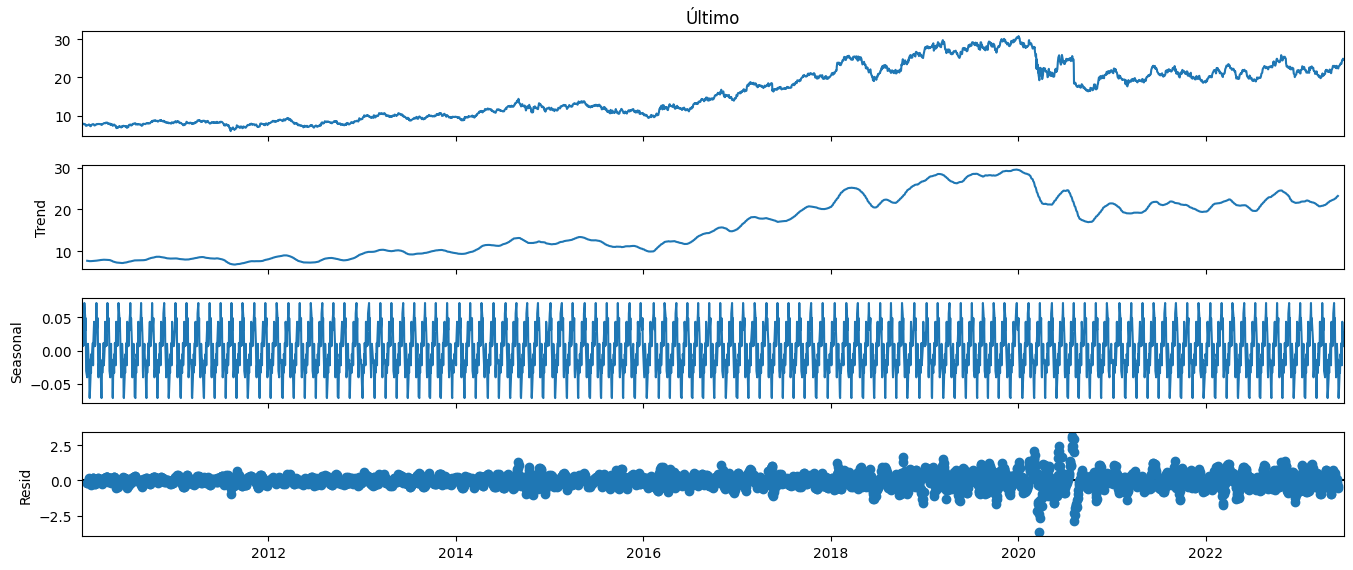

## Decomposição da série temporal do Itaú ##


In [634]:
# Definir a coluna 'Data' como índice
indexed_df = all_data.set_index('Data')

# Remover as colunas indesejadas
indexed_df = indexed_df.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], axis=1)

# Converter a coluna 'Último' para o tipo float
indexed_df['Último'] = indexed_df['Último'].astype(float)

# Realizar a decomposição
result = seasonal_decompose(indexed_df['Último'], model='additive', period=30)

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)

plt.show()

print("## Decomposição da série temporal do Itaú ##")

<Figure size 640x480 with 0 Axes>

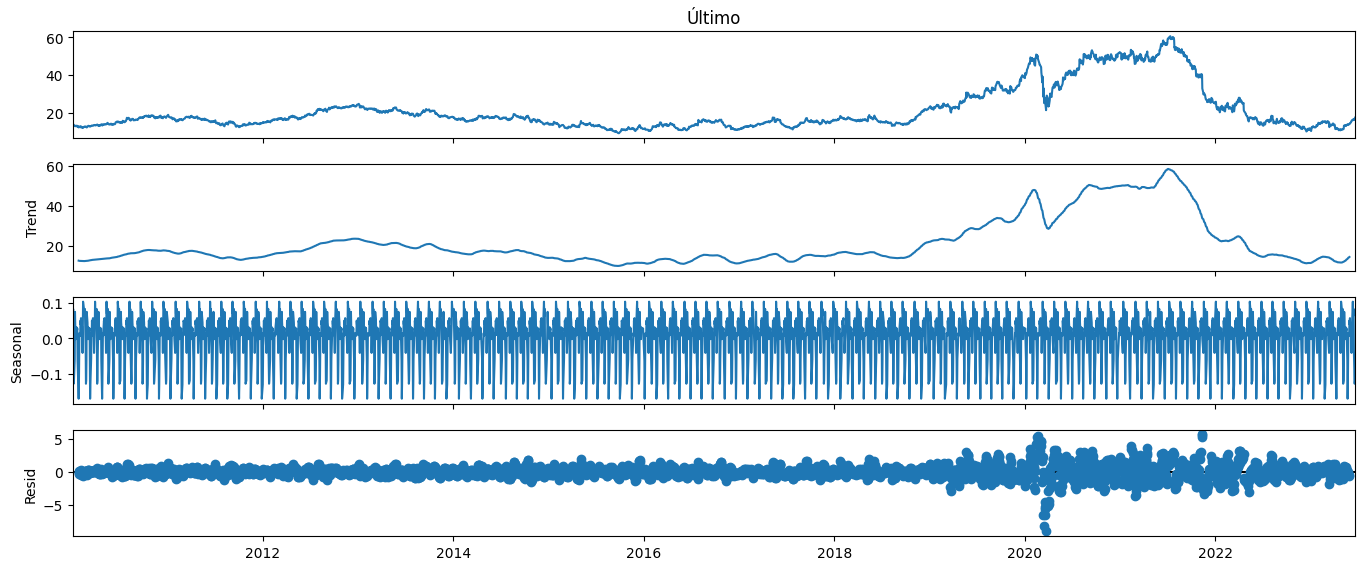

## Decomposição da série temporal da Natura ##


In [635]:
# Definir a coluna 'Data' como índice
indexed_df_nat = all_data_nat.set_index('Data')

# Remover as colunas indesejadas
indexed_df_nat = indexed_df_nat.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], axis=1)

# Converter a coluna 'Último' para o tipo float
indexed_df_nat['Último'] = indexed_df_nat['Último'].astype(float)

# Realizar a decomposição
result = seasonal_decompose(indexed_df_nat['Último'], model='additive', period=30)

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)

plt.show()

print("## Decomposição da série temporal da Natura ##")

In [636]:
df_copy = indexed_df.copy()
df_copy_nat = indexed_df_nat.copy()

# Pré-Processamento - Média Móvel

Nesta etapa do pré-processamento, é aplicada a técnica de média móvel nos dados de preço de fechamento das ações do Banco Itaú. A média móvel é calculada usando um kernel de convolução com pesos definidos.

### Kernel de Convolução

Um kernel de convolução é criado usando a função np.array para definir os pesos. Neste caso, o kernel é [1, 3, 5, 3, 1] dividido por 13. Esse kernel é utilizado para realizar a convolução e obter a média móvel dos dados.

### Cálculo da Média Móvel

A média móvel é calculada aplicando a convolução entre os dados originais de preço de fechamento (coluna 'Último' do DataFrame df_copy) e o kernel de convolução. O parâmetro mode='same' é utilizado para garantir que a média móvel tenha o mesmo tamanho dos dados originais.

kernel_conv:  [0.07692308 0.23076923 0.38461538 0.23076923 0.07692308]


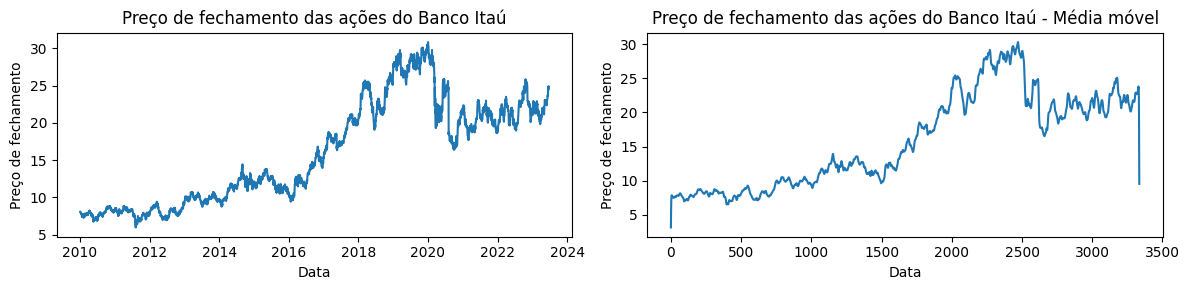

In [637]:
# Kernel de convolução
kernel_conv = np.array([1, 3, 5, 3, 1]) / 13
print("kernel_conv: ", kernel_conv)
# Cálculo da média móvel
media_movel = df_copy['Último'].copy()
# Quantidade de Filtros de Média Móvel
n_conv = 5
for i in range(n_conv):
    # Aplicar o filtro
    media_movel = np.convolve(media_movel, kernel_conv, mode='same')


# Plotar os gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# Gráfico dos dados originais
ax[0].plot(df_copy['Último'])
ax[0].set_title('Preço de fechamento das ações do Banco Itaú')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Preço de fechamento')

# Gráfico da média móvel
ax[1].plot(media_movel)
ax[1].set_title(
    'Preço de fechamento das ações do Banco Itaú - Média móvel')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Preço de fechamento')


# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

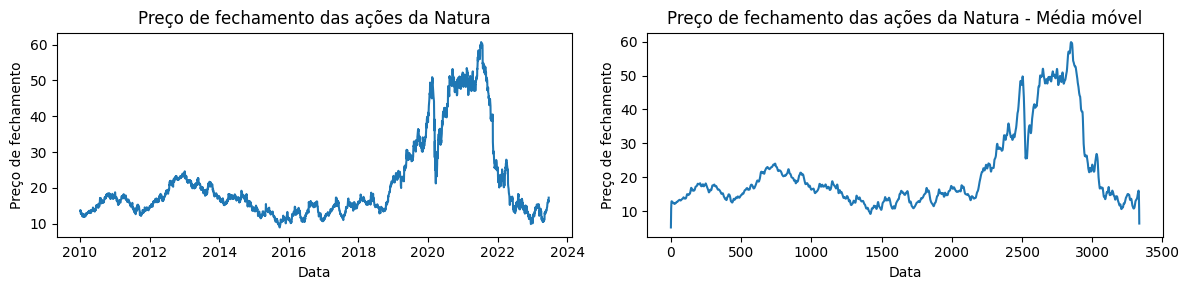

In [638]:
media_movel_nat = df_copy_nat['Último'].copy()
# Quantidade de Filtros de Média Móvel

for i in range(n_conv):
    # Aplicar o filtro
    media_movel_nat = np.convolve(media_movel_nat, kernel_conv, mode='same')


# Plotar os gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# Gráfico dos dados originais
ax[0].plot(df_copy_nat['Último'])
ax[0].set_title('Preço de fechamento das ações da Natura')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Preço de fechamento')

# Gráfico da média móvel
ax[1].plot(media_movel_nat)
ax[1].set_title(
    'Preço de fechamento das ações da Natura - Média móvel')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Preço de fechamento')


# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Nesta etapa, é realizada a decomposição sazonal dos dados de média móvel calculados anteriormente.

<Figure size 640x480 with 0 Axes>

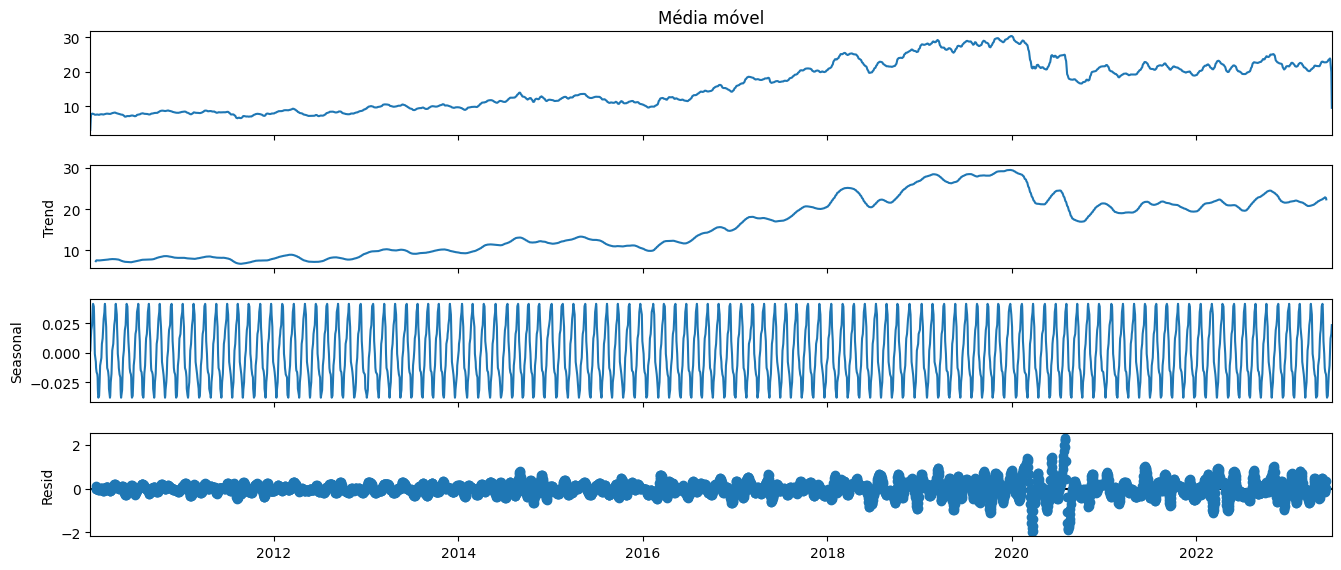

In [639]:
# Seasonal Decompose - Média móvel
df_copy['Média móvel'] = media_movel

# Realizar a decomposição
result = seasonal_decompose(df_copy['Média móvel'], model='additive', period=30)

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)
plt.show()

<Figure size 640x480 with 0 Axes>

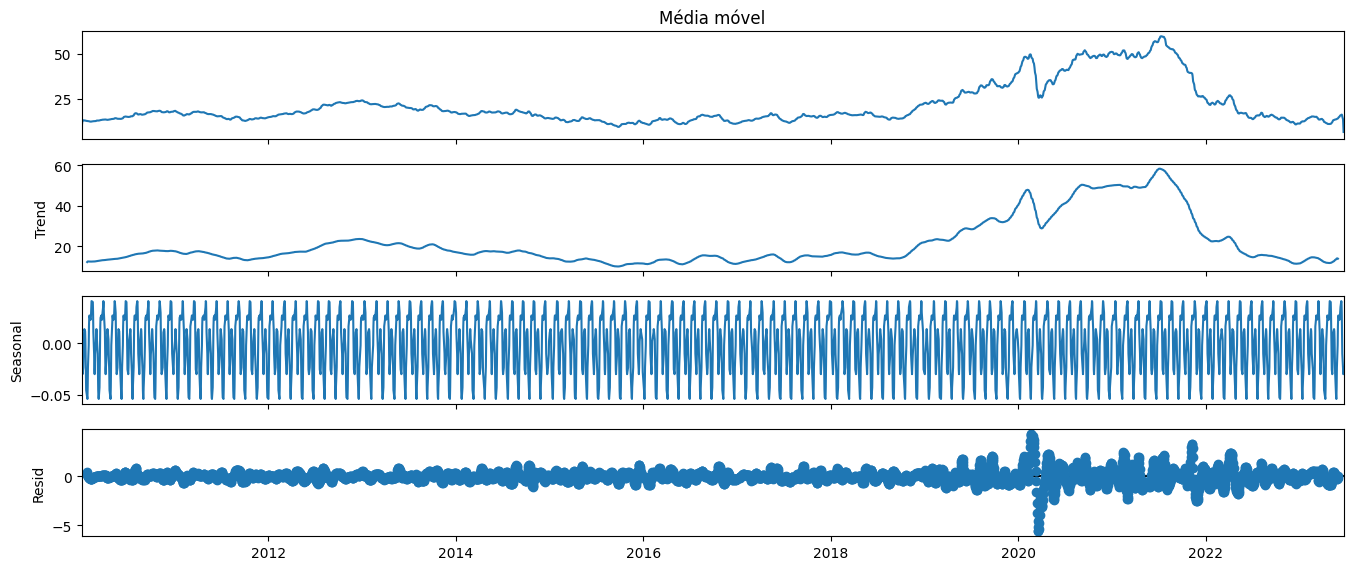

In [640]:
# Seasonal Decompose - Média móvel
df_copy_nat['Média móvel']  = media_movel_nat

# Realizar a decomposição
result = seasonal_decompose(df_copy_nat['Média móvel'], model='additive', period=30)

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)
plt.show()

## Diferença entre Preço de Fechamento e Média Móvel

Nesta etapa, é calculada a diferença entre os valores do preço de fechamento das ações do Banco Itaú e a média móvel calculada anteriormente. Essa diferença é útil para identificar os desvios em relação à tendência suavizada.

### Cálculo da Diferença

A coluna 'Média móvel' é convertida para o tipo float utilizando o método astype(float). Em seguida, é calculada a diferença entre os valores do preço de fechamento (coluna 'Último') e a média móvel, e o resultado é armazenado na coluna 'Diferença'.

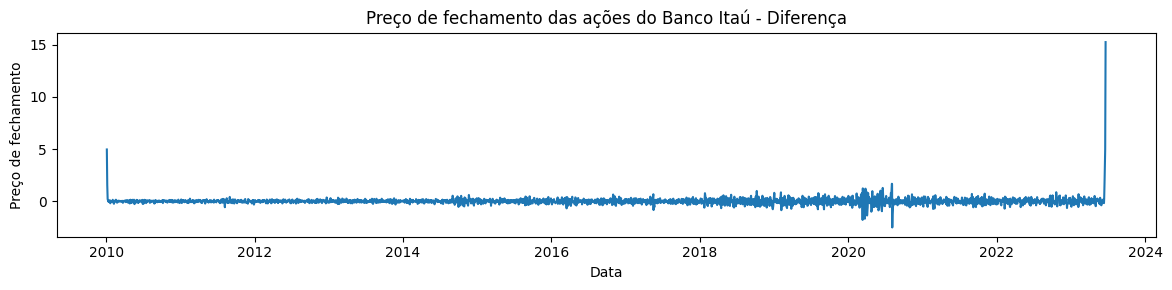

In [641]:
# Transformar a coluna 'Média móvel' em float
df_copy['Média móvel'] = df_copy['Média móvel'].astype(float)

# Calcular a diferença entre os valores
df_copy['Diferença'] = df_copy['Último'] - df_copy['Média móvel']

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(df_copy['Diferença'])
ax.set_title('Preço de fechamento das ações do Banco Itaú - Diferença')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


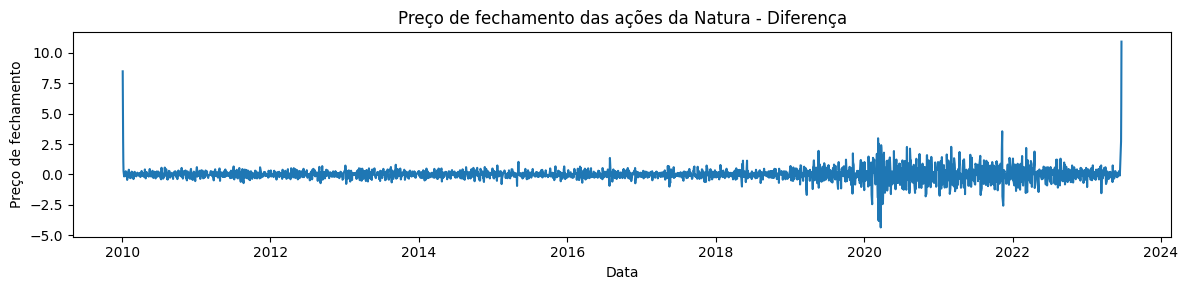

In [642]:
# Transformar a coluna 'Média móvel' em float
df_copy_nat['Média móvel'] = df_copy_nat['Média móvel'].astype(float)

# Calcular a diferença entre os valores
df_copy_nat['Diferença'] = df_copy_nat['Último'] - df_copy_nat['Média móvel']

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(df_copy_nat['Diferença'])
ax.set_title('Preço de fechamento das ações da Natura - Diferença')
ax.set_xlabel('Data')
ax.set_ylabel('Preço de fechamento')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


# Separação dos Dados de Treino e Teste

Nesta etapa, os dados são divididos em conjunto de treino e conjunto de teste, utilizando os dados pré-processados através da técnica de média móvel.

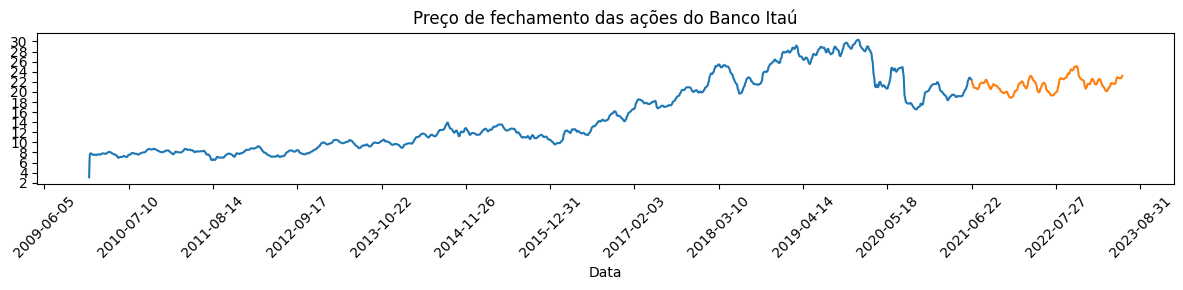

In [643]:
# Separa os dados de treino e teste
train = df_copy[:train_samples]
test = df_copy[train_samples:train_samples + test_samples]

# Drop das colunas indesejadas
train = train.drop(['Último', 'Diferença'], axis=1)
test = test.drop(['Último', 'Diferença'], axis=1)

# Drop das linhas inicias e finais
test = test.drop(test.index[- (n_conv*2):], axis=0)

# Ajustar tamanho de train e test
train_samples = len(train)
test_samples = len(test)

# Rename da coluna 'Média móvel'
train = train.rename(columns={'Média móvel': 'Fechamento'})
test = test.rename(columns={'Média móvel': 'Fechamento'})

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste
ax.plot(train['Fechamento'], label='Treino')
ax.plot(test['Fechamento'], label='Teste')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações do Banco Itaú')
plt.xlabel('Data')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

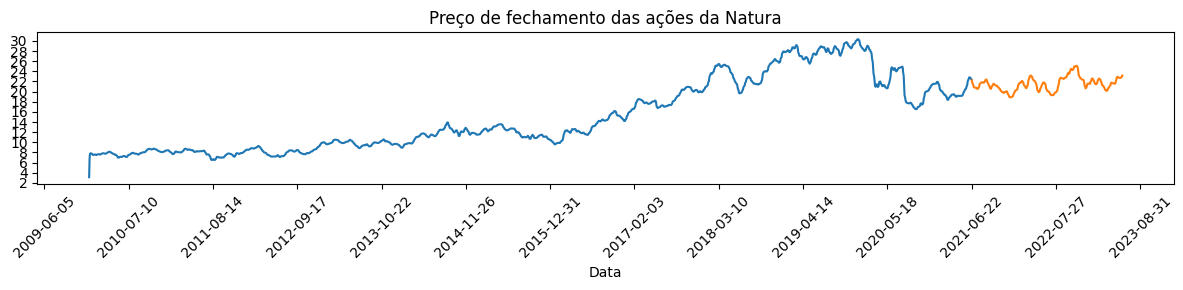

In [644]:
# Separa os dados de treino e teste
train_nat = df_copy_nat[:train_samples]
test_nat = df_copy_nat[train_samples:train_samples + test_samples]

# Drop das colunas indesejadas
train_nat = train_nat.drop(['Último', 'Diferença'], axis=1)
test_nat = test_nat.drop(['Último', 'Diferença'], axis=1)

# Drop das linhas inicias e finais
test_nat = test_nat.drop(test.index[- (n_conv*2):], axis=0)

# Ajustar tamanho de train e test
train_samples = len(train_nat)
test_samples = len(test_nat)

# Rename da coluna 'Média móvel'
train_nat = train.rename(columns={'Média móvel': 'Fechamento'})
test_nat = test.rename(columns={'Média móvel': 'Fechamento'})

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste
ax.plot(train_nat['Fechamento'], label='Treino')
ax.plot(test_nat['Fechamento'], label='Teste')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações da Natura')
plt.xlabel('Data')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Criação das Variáveis de Lag
Nesta etapa, são criadas as variáveis de lag para o conjunto de treino e teste.

In [645]:
window_size = 5

df_lag = pd.DataFrame()
df_lag_nat = pd.DataFrame()

# Criar as colunas com os valores passados
for i in range(window_size, 0, -1):
    df_lag['lag_' + str(i)] = train['Fechamento'].shift(i)
    df_lag_nat['lag_' + str(i)] = train_nat['Fechamento'].shift(i)

# Criar a coluna com os valores futuros
df_lag['futuro'] = train['Fechamento'].shift(-1)
df_lag_nat['futuro'] = train_nat['Fechamento'].shift(-1)

# Drop das linhas com valores nulos
df_lag = df_lag.dropna()
df_lag_nat = df_lag_nat.dropna()

In [646]:
# Criar as colunas com os valores passados
df_lag_test = pd.DataFrame()
df_lag_test_nat = pd.DataFrame()

for i in range(window_size, 0, -1):
    df_lag_test['lag_' + str(i)] = test['Fechamento'].shift(i)
    df_lag_test_nat['lag_' + str(i)] = test_nat['Fechamento'].shift(i)

# Criar a coluna com os valores futuros
df_lag_test['futuro'] = test['Fechamento'].shift(-1)
df_lag_test_nat['futuro'] = test_nat['Fechamento'].shift(-1)

# Drop das linhas com valores nulos
df_lag_test = df_lag_test.dropna()
df_lag_test_nat = df_lag_test_nat.dropna()

# Exibir as 5 primeiras linhas
df_lag_test.head()

# Separa os dados de treino e teste
X_test = df_lag_test.drop('futuro', axis=1)
y_test = df_lag_test['futuro']

X_test_nat = df_lag_test.drop('futuro', axis=1)
y_test_nat = df_lag_test['futuro']


# Random Forest Regressor

Nesta etapa, é criado um modelo de regressão utilizando o algoritmo Random Forest Regressor. O modelo é treinado com os dados de treino e testado com os dados de teste.

In [647]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Separa os dados de treino e teste
X_train = df_lag.drop('futuro', axis=1)
y_train = df_lag['futuro']

X_train_nat = df_lag_nat.drop('futuro', axis=1)
y_train_nat = df_lag_nat['futuro']

## Treinando modelo

In [648]:
# Criar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_nat = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
# Treinar o modelo
model.fit(X_train, y_train)
model_nat.fit(X_train_nat, y_train_nat)

RandomForestRegressor(n_jobs=-1, random_state=42)

## Avaliação do Modelo

Certifique-se de ter as variáveis de entrada `X_test` e saída `y_test` corretamente definidas antes de executar este código. A função `predict()` é utilizada para fazer as previsões no conjunto de teste utilizando o modelo treinado. Em seguida, o erro médio quadrático (MSE) é calculado utilizando a função `mean_squared_error()`, e o erro médio absoluto (MAE) é calculado utilizando a função `mean_absolute_error()`. Os resultados de MSE e MAE são impressos na tela.

Essa etapa de avaliação é fundamental para compreender o desempenho do modelo em relação aos dados de teste e obter métricas que permitam comparar com outros modelos ou realizar otimizações posteriores.



In [649]:
# Evaluar o modelo
y_pred = model.predict(X_test)
y_pred_nat = model_nat.predict(X_test_nat)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
mse_nat = mean_squared_error(y_test_nat, y_pred_nat)
print("Mean Squared Error (Itau): ", mse)
print("Mean Squared Error (Natura): ", mse_nat)

# Calcular o erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)
mae_nat = mean_absolute_error(y_test_nat, y_pred_nat)
print("Mean absolute error (Itau): ", mae)
print("Mean absolute error (Natura): ", mae_nat)

Mean Squared Error (Itau):  0.0493409480130181
Mean Squared Error (Natura):  0.04934094801301787
Mean absolute error (Itau):  0.17106828467318436
Mean absolute error (Natura):  0.17106828467318402


In [650]:
# Coletar o último dia do conjunto de treino
ultimo_dia_treino_data = df_copy.index[train_samples]
ultimo_dia_treino_data 

Timestamp('2021-06-22 00:00:00')

In [651]:
# Criar dataframe com os valores futuros
df_futuro = pd.DataFrame(index=pd.date_range(ultimo_dia_treino_data, periods=test_samples + 4, freq='D'))

# Ajustar shape para o y_pred
df_futuro = df_futuro[:y_pred.shape[0]]

# Adicionar a coluna com os valores futuros
df_futuro['Fechamento Previsto'] = y_pred
df_futuro['Fechamento Original'] = y_test.values


In [652]:
# Criar dataframe com os valores futuros
df_futuro_nat = pd.DataFrame(index=pd.date_range(ultimo_dia_treino_data, periods=test_samples + 4, freq='D'))

# Ajustar shape para o y_pred
df_futuro_nat = df_futuro_nat[:y_pred_nat.shape[0]]

# Adicionar a coluna com os valores futuros
df_futuro_nat['Fechamento Previsto'] = y_pred_nat
df_futuro_nat['Fechamento Original'] = y_test_nat.values


##  Resultado do modelo Random Forest Regressor

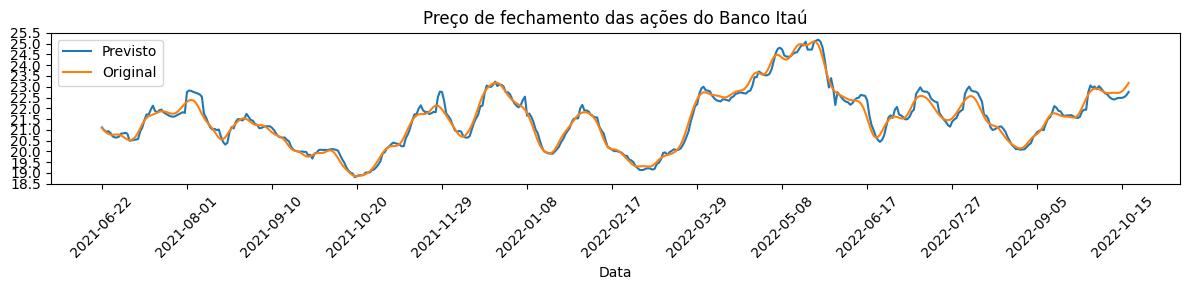

In [653]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste

# Gráfico dos dados previstos
ax.plot(df_futuro['Fechamento Previsto'], label='Previsto')
ax.plot(df_futuro['Fechamento Original'], label='Original')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações do Banco Itaú')
plt.xlabel('Data')
plt.legend()
# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


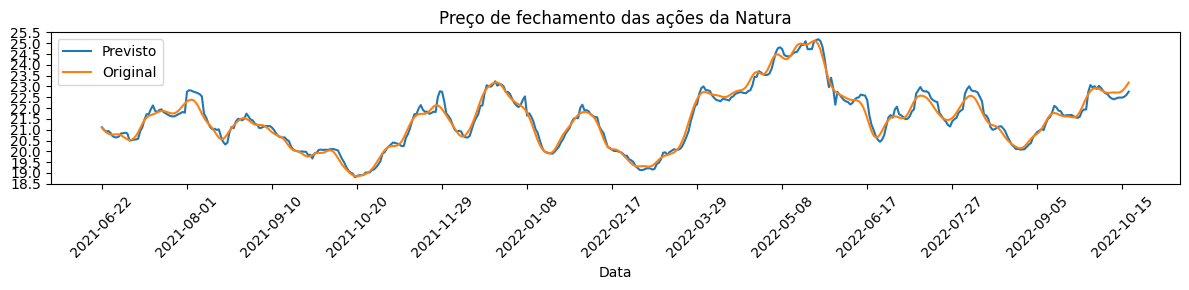

In [654]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste

# Gráfico dos dados previstos
ax.plot(df_futuro_nat['Fechamento Previsto'], label='Previsto')
ax.plot(df_futuro_nat['Fechamento Original'], label='Original')

# Definir a frequência dos marcadores nos eixos x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(tick))
ax.yaxis.set_major_locator(plt.MaxNLocator(tick))

# Rotacionar os marcadores do eixo x
plt.xticks(rotation=45)

plt.title('Preço de fechamento das ações da Natura')
plt.xlabel('Data')
plt.legend()
# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Erro Médio Quadrático (MSE) e Erro Médio Absoluto (MAE) nos últimos 5 dias de teste

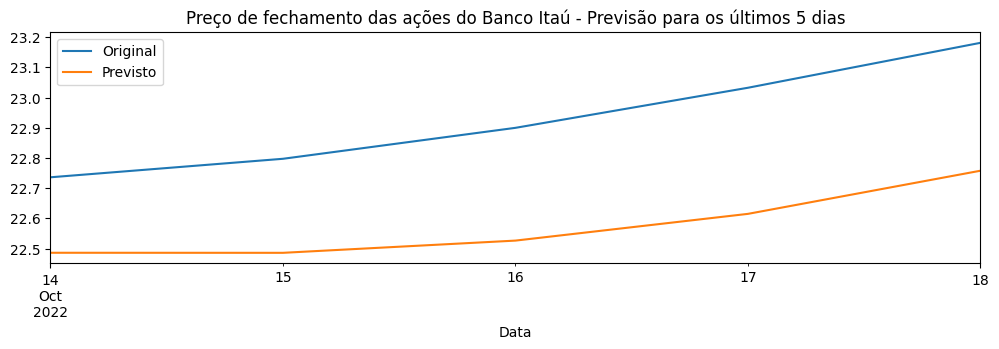

In [655]:
samples = 5
ultimos_Y = df_futuro['Fechamento Original'][-samples:]
ultimos_Y_pred = df_futuro['Fechamento Previsto'][-samples:]

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

ultimos_Y.plot(ax=ax, label='Original')
ultimos_Y_pred.plot(ax=ax, label='Previsto')

plt.title('Preço de fechamento das ações do Banco Itaú - Previsão para os últimos 5 dias')

plt.xlabel('Data')

plt.legend()



In [656]:
print ("Erro médio quadrático (MSE): ", mean_squared_error(ultimos_Y, ultimos_Y_pred))
print ("Erro médio absoluto (MAE):: ", mean_absolute_error(ultimos_Y, ultimos_Y_pred))

Erro médio quadrático (MSE):  0.13044920275319533
Erro médio absoluto (MAE)::  0.3550684924200631


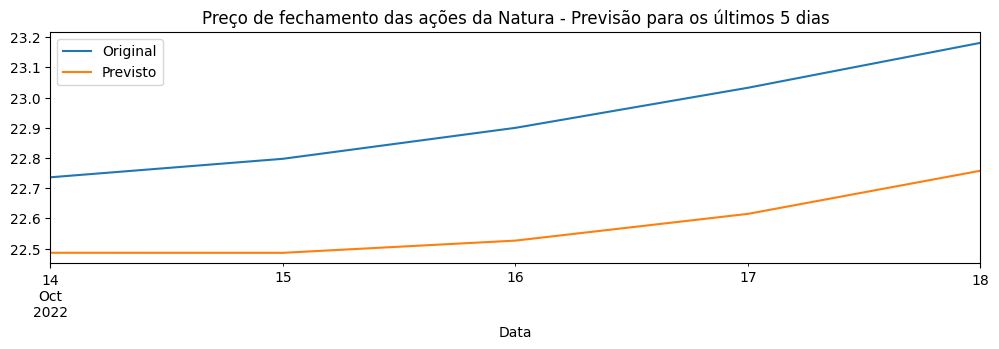

In [657]:
samples = 5
ultimos_Y = df_futuro_nat['Fechamento Original'][-samples:]
ultimos_Y_pred = df_futuro_nat['Fechamento Previsto'][-samples:]

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

ultimos_Y.plot(ax=ax, label='Original')
ultimos_Y_pred.plot(ax=ax, label='Previsto')

plt.title('Preço de fechamento das ações da Natura - Previsão para os últimos 5 dias')

plt.xlabel('Data')

plt.legend()



In [658]:
print ("Erro médio quadrático (MSE): ", mean_squared_error(ultimos_Y, ultimos_Y_pred))
print ("Erro médio absoluto (MAE):: ", mean_absolute_error(ultimos_Y, ultimos_Y_pred))

Erro médio quadrático (MSE):  0.13044920275319646
Erro médio absoluto (MAE)::  0.35506849242006455


# Modelo Regressão Linear

In [659]:
from sklearn.linear_model import LinearRegression

In [660]:
# Train + Test
data = df_copy.copy()
data = data.drop(['Último', 'Diferença'], axis=1)

# Renomear a coluna
data = data.rename(columns={'Média móvel': 'Fechamento'})
data.head()

,Fechamento
Data,
2010-01-04,3.103405
2010-01-05,5.056387
2010-01-06,6.510993
2010-01-07,7.319456
2010-01-08,7.694778


<Figure size 640x480 with 0 Axes>

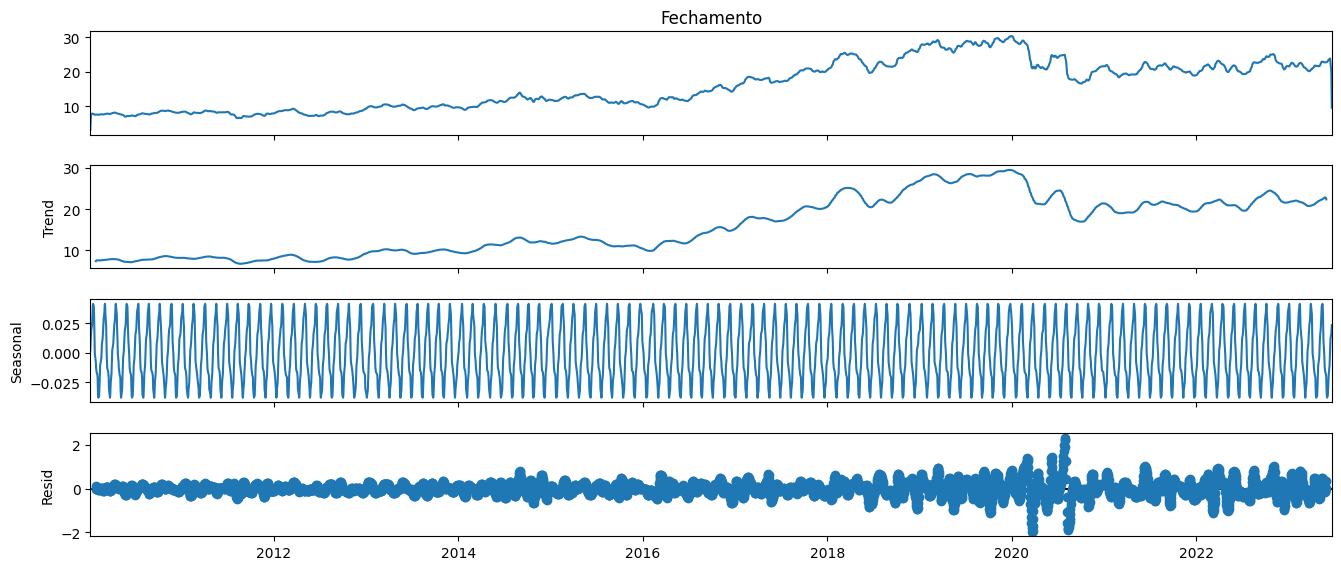

In [661]:

# Realizar a decomposição
result = seasonal_decompose(data['Fechamento'], model='additive', period=30)

# Salvar Trend e Seasonal
trend = result.trend
seasonal = result.seasonal

# Plotar o gráfico
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 6)
plt.show()



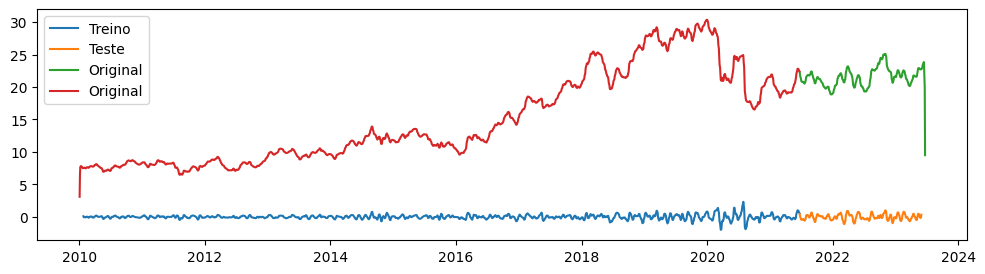

In [662]:
 # Remover a Trend e Seasonal
original = data['Fechamento']
data['Fechamento'] = data['Fechamento']  - seasonal - trend 


# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 3))

# Gráfico dos dados de treino e teste
ax.plot(data[:train_samples]['Fechamento'], label='Treino')
ax.plot(data[train_samples:]['Fechamento'], label='Teste')
ax.plot(original[train_samples:], label='Original')
ax.plot(original[:train_samples], label='Original')

ax.legend()